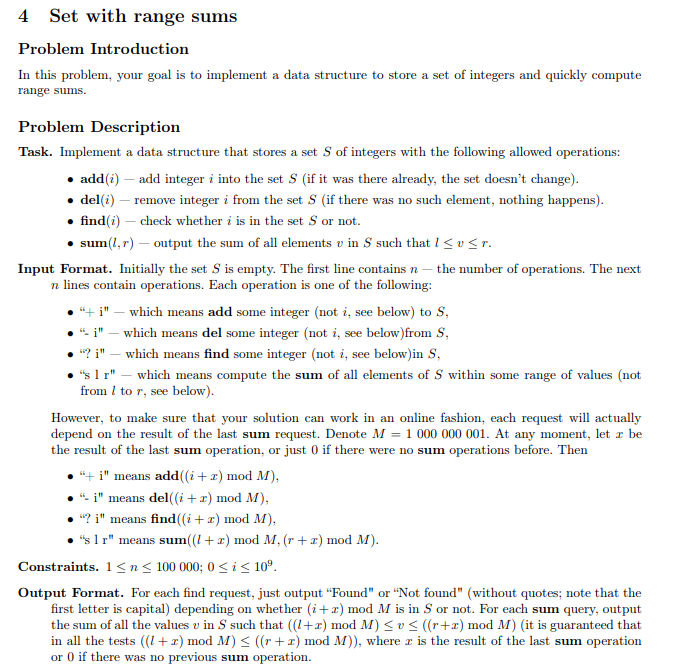

In [ ]:
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1
        self.sum = key  # Augmented field for subtree sum

class AVLTree:
    def __init__(self):
        self.root = None
        self.M = 1000000001  # Given modulo value
        self.last_sum = 0    # Store last sum result
    
    def height(self, node):
        if not node:
            return 0
        return node.height
    
    def balance(self, node):
        if not node:
            return 0
        return self.height(node.left) - self.height(node.right)
    
    def update_height_and_sum(self, node):
        if not node:
            return
        node.height = max(self.height(node.left), self.height(node.right)) + 1
        node.sum = node.key
        if node.left:
            node.sum += node.left.sum
        if node.right:
            node.sum += node.right.sum
    
    def rotate_right(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        self.update_height_and_sum(y)
        self.update_height_and_sum(x)
        return x
    
    def rotate_left(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        self.update_height_and_sum(x)
        self.update_height_and_sum(y)
        return y
    
    def _insert(self, node, key):
        # Standard BST insert
        if not node:
            return Node(key)
        
        if key < node.key:
            node.left = self._insert(node.left, key)
        elif key > node.key:
            node.right = self._insert(node.right, key)
        else:
            return node  # Duplicate keys not allowed
        
        # Update height and sum
        self.update_height_and_sum(node)
        
        # Balance the tree
        balance = self.balance(node)
        
        # Left Left
        if balance > 1 and key < node.left.key:
            return self.rotate_right(node)
        # Right Right
        if balance < -1 and key > node.right.key:
            return self.rotate_left(node)
        # Left Right
        if balance > 1 and key > node.left.key:
            node.left = self.rotate_left(node.left)
            return self.rotate_right(node)
        # Right Left
        if balance < -1 and key < node.right.key:
            node.right = self.rotate_right(node.right)
            return self.rotate_left(node)
        
        return node
    
    def _delete(self, node, key):
        if not node:
            return None
        
        if key < node.key:
            node.left = self._delete(node.left, key)
        elif key > node.key:
            node.right = self._delete(node.right, key)
        else:
            if not node.left:
                return node.right
            elif not node.right:
                return node.left
            temp = self._min_value_node(node.right)
            node.key = temp.key
            node.right = self._delete(node.right, temp.key)
        
        if not node:
            return None
        
        self.update_height_and_sum(node)
        balance = self.balance(node)
        
        # Same balancing cases as insert
        if balance > 1 and self.balance(node.left) >= 0:
            return self.rotate_right(node)
        if balance < -1 and self.balance(node.right) <= 0:
            return self.rotate_left(node)
        if balance > 1 and self.balance(node.left) < 0:
            node.left = self.rotate_left(node.left)
            return self.rotate_right(node)
        if balance < -1 and self.balance(node.right) > 0:
            node.right = self.rotate_right(node.right)
            return self.rotate_left(node)
        
        return node
    
    def _min_value_node(self, node):
        current = node
        while current.left:
            current = current.left
        return current
    
    def _find(self, node, key):
        if not node:
            return False
        if key == node.key:
            return True
        if key < node.key:
            return self._find(node.left, key)
        return self._find(node.right, key)
    
    def _sum_range(self, node, l, r):
        if not node:
            return 0
        if node.key < l:
            return self._sum_range(node.right, l, r)
        if node.key > r:
            return self._sum_range(node.left, l, r)
        return (node.key + 
                self._sum_range(node.left, l, r) + 
                self._sum_range(node.right, l, r))
    
    def process_query(self, query):
        parts = query.split()
        op = parts[0]
        
        if op == '+':
            i = (int(parts[1]) + self.last_sum) % self.M
            self.root = self._insert(self.root, i)
        elif op == '-':
            i = (int(parts[1]) + self.last_sum) % self.M
            self.root = self._delete(self.root, i)
        elif op == '?':
            i = (int(parts[1]) + self.last_sum) % self.M
            print("Found" if self._find(self.root, i) else "Not found")
        elif op == 's':
            l = (int(parts[1]) + self.last_sum) % self.M
            r = (int(parts[2]) + self.last_sum) % self.M
            self.last_sum = self._sum_range(self.root, l, r)
            print(self.last_sum)

def process_queries():
    n = int(input())  # Number of operations
    tree = AVLTree()
    
    for _ in range(n):
        query = input().strip()
        tree.process_query(query)

# Set with Range Sums Implementation

This implementation handles the specific requirements of the problem:

1. **Online Processing**:
   - Maintains `last_sum` for modifying subsequent operations
   - Each operation depends on the previous sum result
   - Uses modulo M (1000000001) for all calculations

2. **AVL Tree Features**:
   - Self-balancing to ensure O(log n) operations
   - Augmented with sum field for efficient range sums
   - Handles all required operations: add, delete, find, sum

3. **Key Operations**:
   - `+ i` → add((i + last_sum) mod M)
   - `- i` → del((i + last_sum) mod M)
   - `? i` → find((i + last_sum) mod M)
   - `s l r` → sum in range [(l + last_sum) mod M, (r + last_sum) mod M]

4. **Time Complexities**:
   - All operations: O(log n)
   - Space complexity: O(n)

# Why Use Binary Search Trees for Range Sums?

Binary Search Trees are ideal for this problem because:

1. **Efficient Updates**
   - Adding/removing elements: O(log n)
   - Maintaining sums: O(log n) per update

2. **Efficient Queries**
   - Finding elements: O(log n)
   - Range sums: O(log n) with augmentation

3. **Balanced Structure**
   - AVL or Red-Black trees ensure balanced height
   - Prevents worst-case O(n) operations

4. **Augmentation Benefits**
   - Each node stores subtree sum
   - Updates propagate up the tree
   - Range queries use subtree information

This makes BSTs superior to:
- Arrays (O(n) for range sum)
- Hash Tables (no efficient range operations)
- Linked Lists (O(n) for everything)